
\newpage

## Question 1

In this assignment, you will delve into the logistic regression algorithm and apply it to a dataset from Kaggle. This will allow you to practice real-world data science skills, including data retrieval, preprocessing, model fitting, inference, and evaluation. 

For this assignment, you will use the "heart disease" dataset available on Kaggle. The dataset is from an ongoing cardiovascular study on residents of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. There is also an interest in interpreting the logistic regression fit.

Link to the dataset: [Heart Disease Dataset on Kaggle](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?resource=download)

1. Ensure you have a Kaggle account. If not, sign up at [kaggle.com](https://www.kaggle.com/). Download the Heart Disease dataset from Kaggle. Cite the dataset.

[@framingham-heart-study-dataset]    

2. Load the dataset into a pandas DataFrame for analysis.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm

In [129]:
df = pd.read_csv('framingham.csv')


In [130]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


3. Perform an initial exploration of the dataset to understand its structure (the number of features, observations, and variable types). Write at least three findings from the exploratory data analysis.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


There are total 4338 obervations. 9 columns is type of float64 and 7 columns is type of int64. 16 columns in total. And there are contain Nan value in this dataset. 

4. Generate summary statistics for the dataset, including description on the categorical variables. Comment on the results (at least two statements). 


In [132]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [133]:
print(df['male'].value_counts())

male
0    2419
1    1819
Name: count, dtype: int64


In [134]:
print(df['TenYearCHD'].value_counts())

TenYearCHD
0    3594
1     644
Name: count, dtype: int64


In [135]:
print(df['education'].value_counts())

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64


In [136]:
print(df['BPMeds' ].value_counts())

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64


In [137]:
print(df['prevalentStroke'].value_counts())

prevalentStroke
0    4213
1      25
Name: count, dtype: int64


In [138]:
print(df['prevalentHyp'].value_counts())

prevalentHyp
0    2922
1    1316
Name: count, dtype: int64


In [139]:
print(df['diabetes'].value_counts())

diabetes
0    4129
1     109
Name: count, dtype: int64


In [140]:
print(df['currentSmoker'].value_counts())

currentSmoker
0    2144
1    2094
Name: count, dtype: int64


There are total 8 categorical variables. As we can see most of the categorical variables only contain 0 and 1 which is binary variable. But eduaction had 4 categorie type of data(1,2,3,4). Among all the data point 1788 of them are currently smoking and 99 of them has diabetes. 

5. Visualize the distribution of `10 year risk of coronary heart disease CHD (TenYearCHD)`. Comment on the plot (at least one statement).

<Axes: xlabel='TenYearCHD', ylabel='count'>

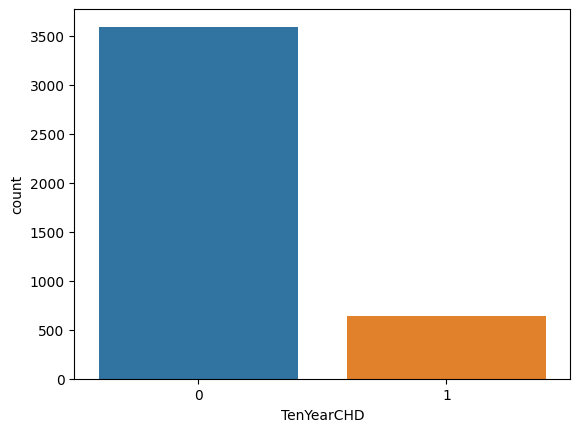

In [141]:
sns.countplot(
    data=df,
    x='TenYearCHD'
)

From kaggle website we know that 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”). Most people do not have heart disease. There approximately around 600-700 people risk of coronary heart disease.

6. Are there any missing values? If you identify any, drop those observations with the missing values.

In [142]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [143]:
df = df.dropna()

Yes, there are missing values in total (105+29+53+50+19+1+388)

7. Skip the outlier analysis. Standardize the numerical predictor variables to ensure they are on the same scale. 



In [144]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [145]:
index = ['education','male', 'BPMeds','currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

for i in index:
    df[i] = pd.Categorical(df[i])

df['age'] = df['age'].astype(float)

df.dtypes

male               category
age                 float64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [146]:
number_col = df.select_dtypes(include='float64').columns

# scale the nuemrical variables
scaler = StandardScaler()

df[number_col] = scaler.fit_transform(df[number_col])

8. Split the dataset into a training set(75\%) and a testing set (25\%).



In [147]:
x = df.drop("TenYearCHD",axis=1)
y = df.TenYearCHD

In [148]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0,
    stratify=y
    )

9. Create an instance of the logistic regression using `scikit-learn`.

In [149]:
ten_log = LogisticRegression(max_iter=80)
ten_log.fit(x_train, y_train)


LogisticRegression(max_iter=80)

10. Train the model on the training set and make predictions on the test set. 



In [150]:


pred_prob = ten_log.predict_proba(x_test)
# pred_prob

11. Calculate the accuracy of the model with the probability cut-off = 0.5 being classified into 10 year risk of coronary heart disease (CHD). Discuss the model's performance (compare the model's performance to flipping a coin)


In [151]:
model_df = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )
model_df['y_test_pred'] = model_df.prob1.map(lambda x: 1 if x>0.5 else 0)
model_df.head()

,prob1,y_test,y_test_pred
2215,0.289570,1,0
1309,0.023346,0,0
863,0.158641,0,0
3256,0.091432,0,0
3235,0.058960,0,0


In [152]:
cm = confusion_matrix(model_df.y_test, model_df.y_test_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[771   4]
 [131   8]]


In [153]:
total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)


Accuracy :  0.8522975929978118


The accuarcy of filping a coin is 50%, the model has above 85% accuarcy which means the model is way better than flipping a coin. 

12. Comment on the sensitivity and specificity of the model (at least one statement).



In [154]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.05755395683453238
Specificity :  0.9948387096774194


THis model do not perform well. Since this model poor at predict true positive case. But it good at avoiding false positives case. And i consider sensitivity and specificity have large gap. Therefore THis model do not perform very well

13. Discuss any potential improvements based on the accuracy and confusion matrix.

we picked way too many variables, we can make improvment on variable selection, only include the variables that is statistically significant to the model

14. Perform ROC analysis and plot the ROC curve. Additionally, calculate the area under the ROC curve (AUC). Determine the optimal probability cut-off point.

In [155]:
model_df = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )

model_df['y_test_pred'] = model_df.prob1.map(lambda x: 1 if x>0.35 else 0)

cm = confusion_matrix(model_df.y_test, model_df.y_test_pred)

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.8468271334792122
Sensitivity :  0.2158273381294964
Specificity :  0.96


auc: 0.7491761429566024


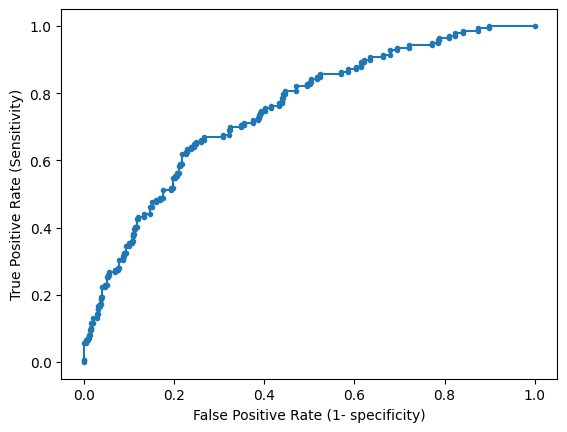

In [156]:
fpr, tpr, thresholds = roc_curve(model_df.y_test, model_df.prob1)
# AUC
print("auc: " + str(roc_auc_score(model_df.y_test, model_df.prob1)))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [157]:
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

0.16950598688119592

From the calculation above the optimal cut off points is 0.16950598688119592(if round up than it will be 0.17). 

15. The remaining questions will use the selected predictor variables: 'male', 'age', 'cigsPerDay', 'diabetes', 'sysBP', 'heartRate'. Create a design matrix with thsese predictors.

In [158]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.233351,4.0,0,-0.757068,0.0,0,0,0,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127,0
1,0,-0.415591,2.0,0,-0.757068,0.0,0,0,0,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956,0
2,1,-0.181945,1.0,1,0.921174,0.0,0,0,0,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930,0
3,0,1.336754,3.0,1,1.760294,0.0,0,1,0,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427,1
4,0,-0.415591,3.0,1,1.172910,0.0,0,0,0,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505,0


In [159]:



c_X = dmatrix(
    "male + age + cigsPerDay + diabetes + sysBP + heartRate",
    data = df,
    return_type = 'dataframe'
)


16. What are the significant variables in predicting the 10-year risk of coronary heart disease ('TenYearCHD') and why? 


In [160]:
y2 = df.TenYearCHD
x2_train, x2_test, y2_train, y2_test = train_test_split(
    c_X, y2, test_size=0.25, random_state=0, stratify=y2)

model2 = sm.Logit(y2_train,x2_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.383478
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2742
Model:                          Logit   Df Residuals:                     2735
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.1018
Time:                        20:35:10   Log-Likelihood:                -1051.5
converged:                       True   LL-Null:                       -1170.6
Covariance Type:            nonrobust   LLR p-value:                 1.322e-48
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.1999      0.091    -24.206      0.000      -2.378      -2.022
male[T.1]         0.5100      0.123      4.157      0.000       0.270       0.750
diabetes[T.1]     0.5652      0.273      2.067      0.039       0.029       1.101
age               0.5195      0.063      8.236      0.000       0.396       0.643
cigsPerDay        0.2208      0.057      3.884      0.000       0.109       0.332
sysBP             0.4247      0.055      7.737      0.000       0.317       0.532
heartRate         0.0054      0.056      0.097      0.923      -0.104       0.115
=================================================================================
"""

The only not significant variable is heartRate. Since we know that to determine a variable is significance or not by looking at p value and alphe. we can see that the p value of heartrate is 0.923 which is greater then alpha(0.05). Then the rest of the variable is all less then alpha(0.05). So the rest of the variable is significance.

17. Interpret the coefficient of diabetes in predicting the 10 year risk of coronary heart disease ('TenYearCHD')

The logodds of getting (TenYearCHD) increase 0.5652 for the people who have diabetes than not have diabetes, we hold all other variable fixed